In [2]:
# Import the necessary modules
import numpy as np
import tensorflow as tf
import tensorflow.keras as kr
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler



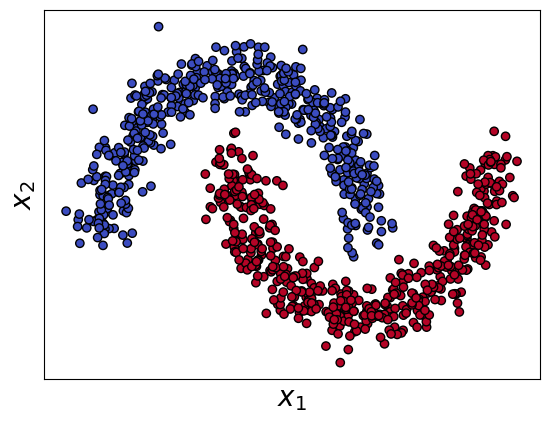

In [3]:
X, y = make_moons(n_samples=1000, noise=0.1,shuffle=True, random_state=1)

#When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
#plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
#plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")

# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Simplifying the plot by removing the axis scales.
plt.xticks([])
plt.yticks([])

# Displaying the plot.
plt.show()


In [4]:
# Particionar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
lr=0.05 #Learning rate


model = kr.Sequential()

#Primera capa
l1=model.add(kr.layers.Dense(64,activation='relu'))

#Segunda capa

l2=model.add(kr.layers.Dense(32,activation='relu'))

#Tercera capa

l3=model.add(kr.layers.Dense(16,activation='relu'))

#Ultima capa

l4=model.add(kr.layers.Dense(1,activation='sigmoid'))

#Compilación del modelo

model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=0.05),metrics=['acc'])

#Entrenamiento del modelo
model.fit(X_train_scaled, y_train,validation_data=(X_test_scaled, y_test), epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.5652 - loss: 0.2431 - val_acc: 0.8500 - val_loss: 0.1992
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8408 - loss: 0.1934 - val_acc: 0.8600 - val_loss: 0.1601
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8507 - loss: 0.1572 - val_acc: 0.8600 - val_loss: 0.1303
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8418 - loss: 0.1350 - val_acc: 0.8650 - val_loss: 0.1104
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8634 - loss: 0.1112 - val_acc: 0.8750 - val_loss: 0.0992
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8573 - loss: 0.1038 - val_acc: 0.8800 - val_loss: 0.0923
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8709 - loss: 0.0950 - val_acc: 0.8850 - val_loss: 0.0878
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8690 - loss: 0.0894 - val_acc: 0.8850 - val_loss: 0.0848
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8888

7095/7095 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


<ipython-input-6-ebd57bacf8b5>:27: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap="coolwarm", edgecolors='k', marker='x', label='Prueba')


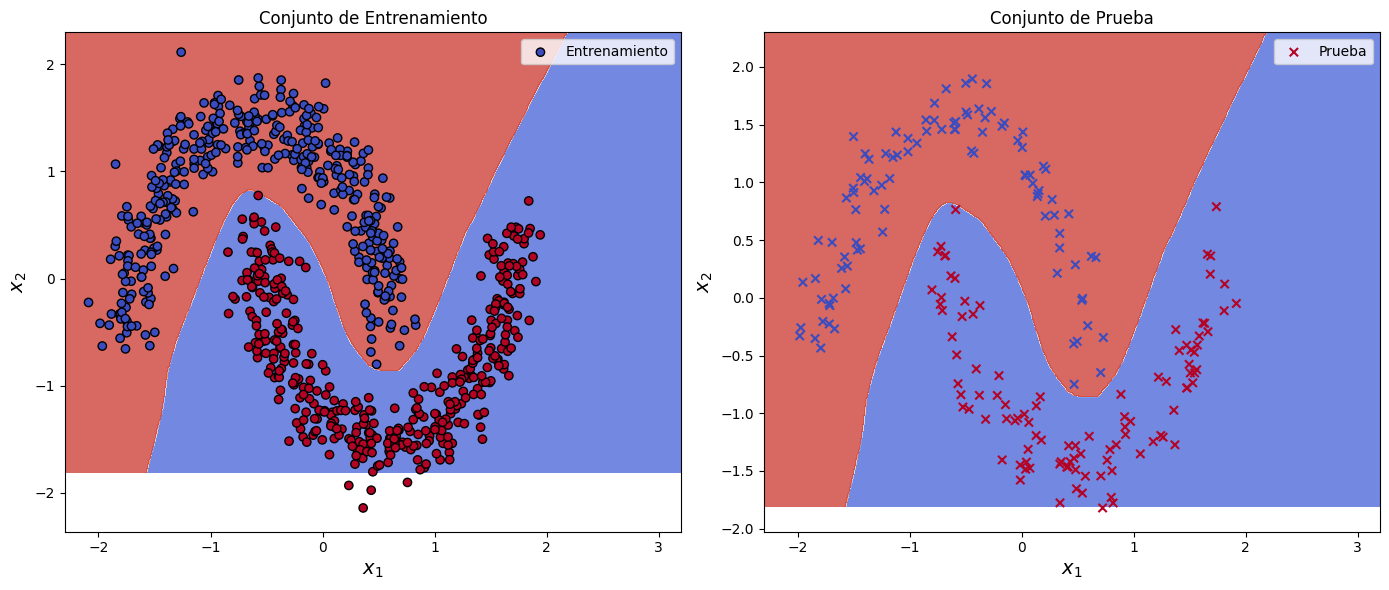

In [6]:
# Crear la malla de puntos para cubrir el espacio (igual que antes)
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                       np.arange(x2_min, x2_max, 0.01))

# Predecir la salida del modelo para cada punto en la malla
grid_points = np.c_[xx1.ravel(), xx2.ravel()]
Z = model.predict(grid_points)
Z = (Z < 0.5).astype(int)  # Convertir a etiquetas binarias (0 o 1)
Z = Z.reshape(xx1.shape)

# Crear la figura con dos subgráficas
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# **Gráfico para el conjunto de entrenamiento**
# Graficar la región de clasificación
ax[0].contourf(xx1, xx2, Z, alpha=0.8, cmap="coolwarm")
# Graficar los datos de entrenamiento
ax[0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap="coolwarm", edgecolors='k', marker='o', label='Entrenamiento')
ax[0].set_title("Conjunto de Entrenamiento")

# **Gráfico para el conjunto de prueba**
# Graficar la región de clasificación
ax[1].contourf(xx1, xx2, Z, alpha=0.8, cmap="coolwarm")
# Graficar los datos de prueba
ax[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap="coolwarm", edgecolors='k', marker='x', label='Prueba')
ax[1].set_title("Conjunto de Prueba")

# Etiquetas y leyenda
for a in ax:
    a.set_xlabel(r"$x_1$", fontsize=14)
    a.set_ylabel(r"$x_2$", fontsize=14)
    a.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()

In [7]:
#Segundo punto
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

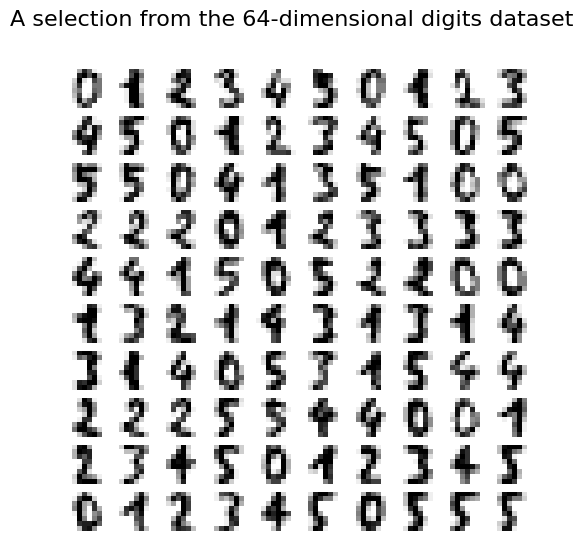

In [8]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled.shape[1]

64

In [23]:
lr=0.01 #Learning rate


model = kr.Sequential()

#Primera capa
l1=model.add(kr.layers.Dense(128,activation='relu', input_shape=(X_train_scaled.shape[1],)))

#Segunda capa

l2=model.add(kr.layers.Dense(64,activation='relu'))

#Tercera capa

l3=model.add(kr.layers.Dense(32,activation='relu'))

#Cuarta capa

l4=model.add(kr.layers.Dense(16,activation='relu'))
#Ultima capa

l4=model.add(kr.layers.Dense(6,activation='softmax'))

#Compilación del modelo

model.compile(loss='sparse_categorical_crossentropy', optimizer=kr.optimizers.SGD(learning_rate=0.05),metrics=['acc'])

#Entrenamiento del modelo
model.fit(X_train_scaled, y_train,validation_data=(X_test_scaled, y_test), epochs=10)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.3925 - loss: 1.6344 - val_acc: 0.8203 - val_loss: 0.9677
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8952 - loss: 0.7537 - val_acc: 0.9124 - val_loss: 0.3666
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9421 - loss: 0.2716 - val_acc: 0.9401 - val_loss: 0.1863
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9738 - loss: 0.1316 - val_acc: 0.9078 - val_loss: 0.2393
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9818 - loss: 0.0932 - val_acc: 0.9908 - val_loss: 0.0740
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9945 - loss: 0.0483 - val_acc: 0.9954 - val_loss: 0.0562
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9956 - loss: 0.0408 - val_acc: 0.9954 - val_loss: 0.0450
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9986 - loss: 0.0253 - val_acc: 0.9954 - val_loss: 0.0408
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.9991 - loss: 

In [31]:
from sklearn.metrics import confusion_matrix


# Predicción
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)


print("Matriz de confusión:")
print(cm)



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Matriz de confusión:
[[39  0  0  0  0  0]
 [ 0 33  0  0  0  0]
 [ 0  0 39  0  0  0]
 [ 0  0  2 37  0  1]
 [ 0  0  0  0 39  0]
 [ 0  0  0  0  0 27]]
